#pandas - библиотека для работы с табличками 

*тут должен быть кринжевый мем про панду*




Данные экспериментов, да и не только удобно хранить в табличках.

Ок, у нас есть эксель, а что, если мы хотим, написать программу, которая будет делать что-то с нашими табличными данными? Pandas позволяет работать с различными табличками при помощи python !  

Кстати, пандас это надстройка над numpy. Нампай для быстрой математики, а пандас для графиков, статистики, и удобства хранения !

Звучит скучно, но, на самом деле, все не так плохо !
Вот некоторые полезные ссылки по теме: 

- документация: http://pandas.pydata.org/pandas-docs/stable/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- туториал: DataFrames in Python: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

Мы будем работать с данными датасета Titanic: он содержит информацию  о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

Вы можете скачать этот датасет себе на компьютер и отрыть к экселе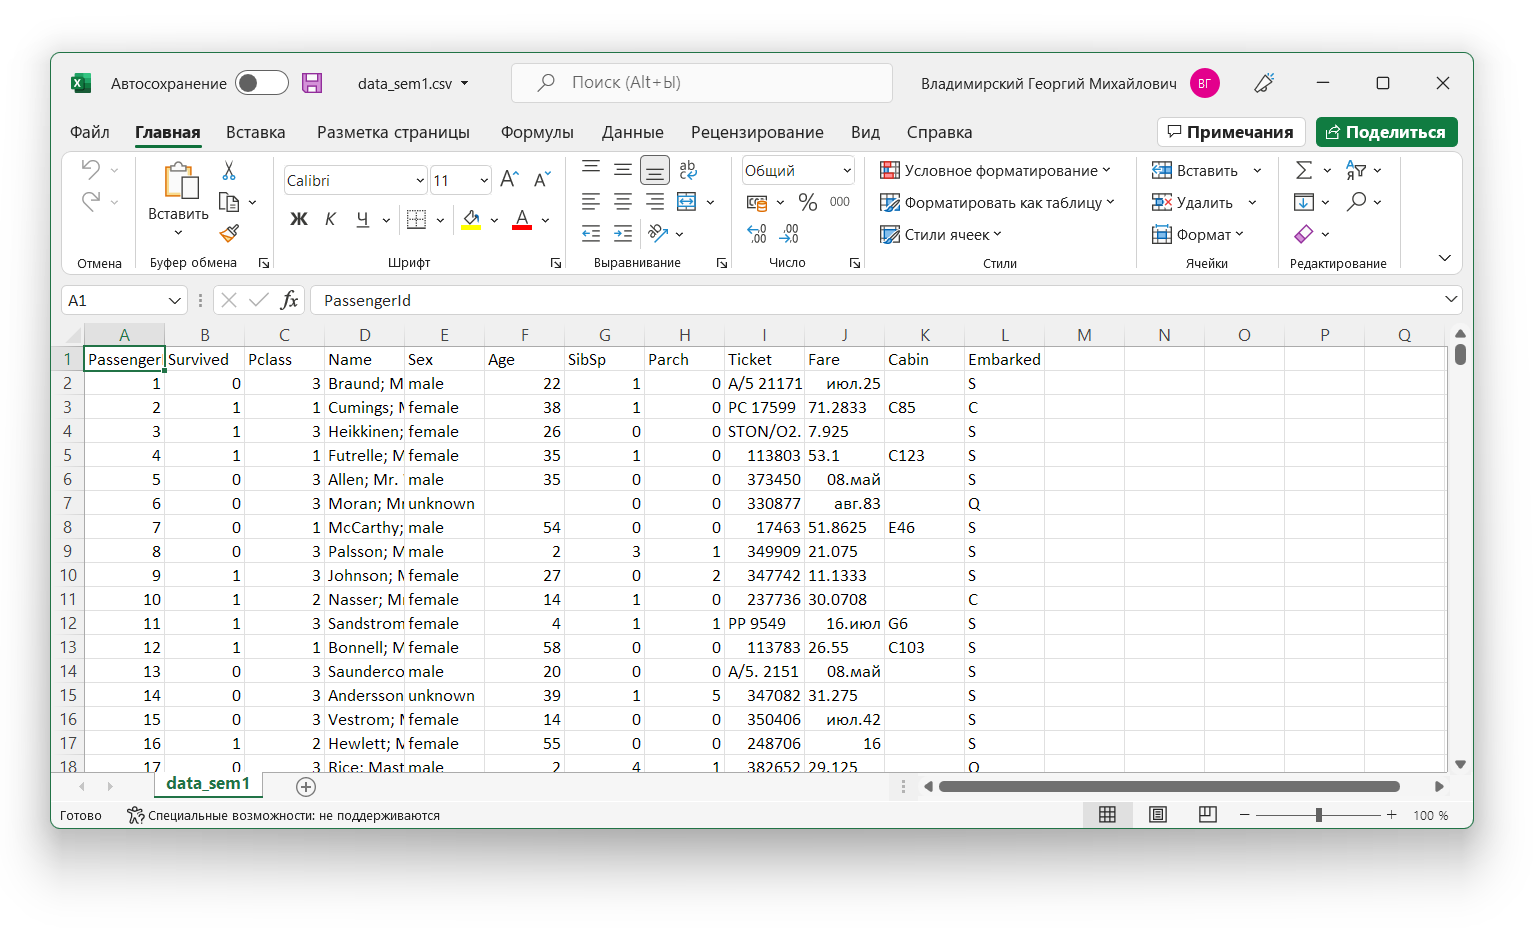

Видели? Ну да, я не врал, это просто таблички.

Полезный функционал:
* параметр df.dtypes $-$ типы колонок
* метод [df.fillna(value)](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html), value $-$ на что заменить (скаляр или словарь с ключами-названиями колонок)
* методы df.head([N]) и df.tail([N]) $-$ показать N (необязательный аргумент) первых или последних значений
* параметры df.index, df.columns и df.values $-$ соответственно индексы строк датафрейма, названия колонок и np.array, составленный из значений датафрейма
* метод df.T $-$ транспонировать данные (поменять строки и столбцы местами)
* сортировка данных по индексу (по названиям строк) и по значениям колонки, например df.sort_index(axis=1, ascending=False) и df.sort_values(by='B')
* метод df.copy() $-$ копировать датафрейм

In [ ]:
import pandas as pd #импортирую пандас, буду обращаться к нему в коде, как pd

Читаем csv файл из интернета, благо пандас позволяет. (сsv это просто такой формат хранения табличек, но это не так важно)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep =';') #конкретно в этом файле строчки разделены ";", а не запятыми, как это обычно бывает в csv поэтому нам нужно это дополнительно указать

То что у нас получилось называется pandas DataFrame

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head() # функция .head() выводит верхние 5 строчек таблички

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Можно посмотреть форму таблички при помощи атрибута .shape

In [ ]:
data.shape

(891, 12)

Это значит, что в нашей табличке 891 строка и 12 колонок, давайте посмотрим, что это за колонки

Для вывода названий всех признаков есть специальная функция:

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Описание содержания табличек для интересующихся:
- survival	Survival
- pclass	Ticket class
- sex	Sex	
Age	Age in years
- sibsp	# of siblings / spouses aboard the Titanic
- parch	# of parents / children aboard the Titanic
- ticket	Ticket number
- fare	Passenger fare
- cabin	Cabin number
- embarked	Port of Embarkation

Индексироваться в датафрейме можно просто по именам колонок

In [ ]:
data[["Age", "Sex", "Cabin"]]

,Age,Sex,Cabin
0,22.0,male,NaN
1,38.0,female,C85
2,26.0,female,NaN
3,35.0,female,C123
4,35.0,male,NaN
...,...,...,...
886,27.0,male,NaN
887,19.0,female,B42
888,NaN,female,NaN
889,26.0,male,C148


Чтобы индексироваться по датафреймам числовыми индексами можно использовать  .iloc[ ]

Давайте попробуем получить наш датафрейм без последней колонки

In [ ]:
data.iloc[:, :-1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Montvila; Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN
887,888,1,1,Graham; Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42
888,889,0,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,Behr; Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148


В датафрейме можно хранить данные разных типов.
Тип данных в каждой колонке можно посмотреть при помощи атрибута .dtypes 

In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Датафрейм также можно создать вручную из списка

In [ ]:
df = pd.DataFrame({'лохи' : ["маша","ежи","вставьте лоха", None], 'iq лоха' : [10,20,30,40], 'вес лоха (кг)' : [150,10,10000,-50]})
df

,лохи,iq лоха,вес лоха (кг)
0,маша,10,150
1,ежи,20,10
2,вставьте лоха,30,10000
3,None,40,-50


С датасетом можно сделать много всего, например посчитать сумму значений в какой-то колонке

In [ ]:
df['вес лоха (кг)'].sum()

10110

In [ ]:
df['вес лоха (кг)'].max()

10000

In [ ]:
df['вес лоха (кг)'].min()

-50

In [ ]:
df['вес лоха (кг)'].mean()

2527.5

Можно трансонировать табличку

In [ ]:
df.T #  транспонировать данные (поменять строки и столбцы местами)

,0,1,2,3
лохи,маша,ежи,вставьте лоха,None
iq лоха,10,20,30,40
вес лоха (кг),150,10,10000,-50


Заметьте, что после транспонирования табличка не поменялась, потому что мы не присвоили:


In [ ]:
df

,лохи,iq лоха,вес лоха (кг)
0,маша,10,150
1,ежи,20,10
2,вставьте лоха,30,10000
3,None,40,-50


In [ ]:
df_T = df.T #вот тут мы сохранили результат в новую переменную
df_T 

,0,1,2,3
лохи,маша,ежи,вставьте лоха,None
iq лоха,10,20,30,40
вес лоха (кг),150,10,10000,-50


добавим новую колонку, если обратиться к колонке, которой нет в датафрейме -- она автоматически добавится ! прям как в словарях 

In [ ]:
df['Хочет умереть?'] = [True, True, False, False ]
df

,лохи,iq лоха,вес лоха (кг),Хочет умереть?
0,маша,10,150,True
1,ежи,20,10,True
2,вставьте лоха,30,10000,False
3,None,40,-50,False


Помните в numpy мы выбирали определенные значения по условию  ? В пандасе можно так же. 

Допустим, мы хотим узнать, у кого iq больше 10

In [ ]:
df['iq лоха']>10

0    False
1     True
2     True
3     True
Name: iq лоха, dtype: bool

Получилась такая колонка из булевых значений. Используем их как индексы, чтобы выбрать только нужные строчки:

In [ ]:
df[ df['iq лоха']>10 ]

,лохи,iq лоха,вес лоха (кг),Хочет умереть?
1,ежи,20,10,True
2,вставьте лоха,30,10000,False
3,None,40,-50,False


При помощи функции groupby мы можем группировать строки по значению какого-то из столбцов ! На примере станет понятнее:

In [ ]:
df.groupby('Хочет умереть?').mean()

,iq лоха,вес лоха (кг)
Хочет умереть?,,
False,35.0,4975.0
True,15.0,80.0


Так можно сделать, что те, кто хотят умереть в среднем тупее и весят меньше, познавательно !

То что получилось после группировки -- не датафрейм, а страшная хрень (pandas.core.groupby.generic.DataFrameGroupBy object), чтобы получить из нее что-то людское нужно использовать какую-нибудь функцию-атрибут:
* .mean() -- посчитать среднее
* .sum() -- посчитать сумму
* .median() -- почитать медиану


ну итд


https://pandas.pydata.org/docs/reference/groupby.html -- тут можно почитать, че там


In [ ]:
df.groupby('Хочет умереть?')

#Потренеруемся

Скачаем еще раз наш титаник

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep =';') #конкретно в этом файле строчки разделены ";", а не запятыми, как это обычно бывает в csv поэтому нам нужно это дополнительно указать

## Задание 1.
Сколько строчек в нашей табличке? Замечу, что количество строчек равно количеству пассажиров на титанике

In [ ]:
#ваш код

## Задание 2
Сколько людей на титанике выжило?

In [ ]:
#ваш код

342

## Задание 3
Какой процент из пассажиров титаника женщины?

In [ ]:
#ваш код

## Задание 4
Какой средний возраст людей на титанике?

In [ ]:
#ваш код

## Задание 5
Какая доля из всех мужчин выжили ?А женщин?
Подсказка: используйте несолько условий, напр. a & b -- а и 

In [ ]:
#ваш код

## Задание 6

Потренеруем главный навык -- умение гуглить. Найдите в гугле, как в pandas сортировать датафрейм по одной из колонок. Отсортируйте пассажиров по возрасту. 

In [ ]:
#ваш код